# Assignment 04: Support Vector Machines

**Due Date:** Friday 11/08/2024 (by midnight)

**Please fill these in before submitting, just in case I accidentally mix up file names while grading**:

Name: Kenneth Bilicke

CWID-5: 37189

## Introduction

In this assignment you will be using support vector machines (SVMs) with various datasets that
contain only 2 features and a single binary label so that you will be performing binary classification tasks.  Exerimenting with these datasets will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs.

In [1]:
# The following ipython magic will reload changed file/modules.
# So when editing function in source code modules, you should
# be able to just rerun the cell, not restart the whole kernel.
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

# By convention, we often just import the specific classes/functions
# from scikit-learn we will need to train a model and perform prediction.
# Here we include all of the classes and functions you should need for this
# assignment from the sklearn library, but there could be other methods you might
# want to try or would be useful to the way you approach the problem, so feel free
# to import others you might need or want to try
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [3]:
# Import functions/moduls from this project.  We manually set the
# PYTHONPATH to append the location to search for this assignments
# functions to just ensure the imports are found
import sys
sys.path.append("../src")

# assignment function imports for doctests and github autograding
# these are required for assignment autograding
from assg_utils import run_unittests, run_doctests
from assg_tasks import task_1_1_load_data, task_1_2_linear_svm_classifier, gaussian_kernel, task_3_1_load_data, task_3_2_rbf_svm_classifier, plot_svm_decision_boundary

In [4]:
# notebook wide settings to make plots more readable and visually better to understand
np.set_printoptions(suppress=True)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('figure', titlesize=18)
plt.rc('legend', fontsize=14)
plt.rcParams['figure.figsize'] = (12.0, 8.0) # default figure size if not specified in plot
plt.style.use('seaborn-v0_8-darkgrid')

## Task 1.1: Load Data, Explore and Visualize

As we have done before, start by implementing the `task_1_1_load_data()` function to load the first
dataset of this assignment, found in the `src/assg_tasks.py` file.
The first dataset is in a file named `../data/assg-04-data1.csv`.
This dataset has 51 samples, with two features each and a binary
label.  The dataset does not have a separate row that gives names to the columns/features of
the data, you need to correctly give names `x_1` and `x_2` for the two features in the dataframe
that you return.  The tests of this function will check that you are returning a dataframe with
the correct number of samples, and that the binary labels are correct.

As usual, do not modify or remove the following cell.  When your function correctly loads and returns the
expected feature dataframe `X` and target labels `y`, the following cell should run and pass
the tests for your work.

In [5]:
# do not remove or modify the code in this cell
X, y = task_1_1_load_data()
run_unittests(['test_task_1_1_load_data'])

test_X_properties (test_assg_tasks.test_task_1_1_load_data.test_X_properties)
test_X_properties ... ok
test_loaded_types (test_assg_tasks.test_task_1_1_load_data.test_loaded_types)
test_loaded_types ... ok
test_y_properties (test_assg_tasks.test_task_1_1_load_data.test_y_properties)
test_y_properties ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.202s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

In the following cell(s), plot the data from the first dataset that was just loaded
in order to visualize it.  Use blue 'o' symbols for the 0 (or no) label and
red '+' symbols for the 1 (or yes) label.  Make sure you display a legend
and label  your figure axis correctly, the x axis should display the `x_1`
feature and the y axis should plot the `x_2` feature.  

What do you notice about this data?  For example, do you notice any values that
might be outliers in the data?  Is the data linearly separable or not as
given?

Text(0, 0.5, 'Feature x_2')

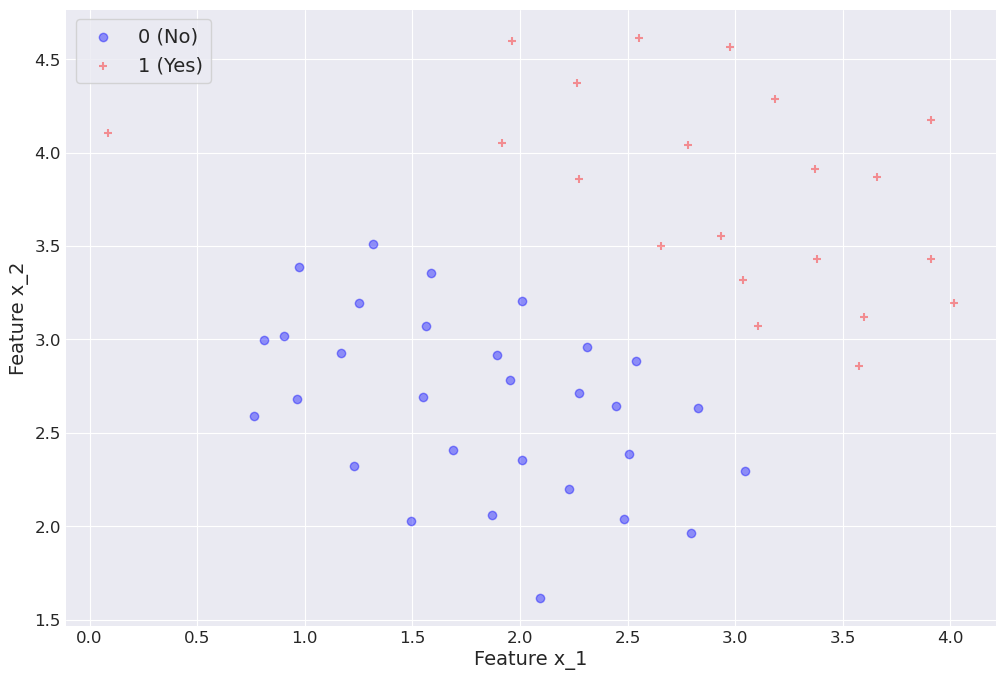

In [6]:
# plot the data to visualize the dataset 1 here
plt.scatter(X[y == 0]['x_1'], X[y == 0]['x_2'], color='blue', marker='o', label='0 (No)', alpha=0.4)
plt.scatter(X[y == 1]['x_1'], X[y == 1]['x_2'], color='red', marker='+', label='1 (Yes)', alpha=0.4)
plt.legend(loc='upper left', frameon=True)
plt.xlabel('Feature x_1')
plt.ylabel('Feature x_2')

You may have noticed that there is a point that appears like it may be a mistake or an outlier in the data.  Notice the positive
example on the far left at about (0.1, 4.1).  As a part of this exercise, you will see how this outlier affects the SVM decision
boundary.

## Task 1.2: Fit Linear support vector classifier using small amount of regularization

You will try using different values of the $C$ parameter with a linear SVM classifier.  We discussed that the $C$ parameter in the
usual formulation of the SVM model corresponds to the $\lambda$ (lambda) parameter we used to specify the level of regularization we wanted
to be used in the model that was found.  Recall back from week 5 that regularization is a penalty term we add when parameters of a model get too big.  The idea is that such terms penalize overfitting of the model.  The $C$ parameter in SVM can be thought
of in the same way, though since it is a paramter on the cost function, smaller values of C represent penalizing the model for
too much overfitting.

Another way to think of $C$ in the context of SVM models is that the $C$ parameter is a positive value that controls the penalty
for misclassified training examples.  A small $C$ parameter tells SVM to not worry so much about some misclassification errors, as
long as the decision boundary is being maximized.  A large $C$ parameter, on the other hand$ tells the SVM optimization to try
hard to correctly classify all the examples correctly.  As we have talked about before, at some point this can lead to overfitting,
and though the model parameters of an overfitted model will classify well (or perfectly) our training set data, they will probably
not perform well on unseen data if the model is overfit.

This example data set has slightly different scales for the two features.  Use a pipeline in
when implementing your function to create a linear SVM model to always scale the data through a `StandardScaler` before fitting
a model and visualizing the results.

In the next cell complete the `task_1_2_linear_svm_classifier()` function.  This function
should take in the `X` features dataframe and `y` binary labels to train a linear support vector
classifier.  The third parameter `C` should be passed into the created SVC classifier to control
the amount of regularization used, and should will be `1.0` for this first linear model that
you create.  In the function, you need to create and return a pipeline.  It is expected that the
first transformer in the pipeline is a standard scalar, followed by a support vector classifier
that uses the given C parameter and fits using a linear kernel.


In [7]:
# do not remove or modify the code in this cell
linclf = task_1_2_linear_svm_classifier(X, y, C=1.0)
run_unittests(['test_task_1_2_linear_svm_classifier'])

test_coef (test_assg_tasks.test_task_1_2_linear_svm_classifier.test_coef)
test_coef ... ok
test_intercept (test_assg_tasks.test_task_1_2_linear_svm_classifier.test_intercept)
test_intercept ... ok
test_model_parameters (test_assg_tasks.test_task_1_2_linear_svm_classifier.test_model_parameters)
test_model_parameters ... ok
test_model_pipeline (test_assg_tasks.test_task_1_2_linear_svm_classifier.test_model_pipeline)
test_model_pipeline ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.027s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

For this part of the assignment, determine
the model parameters (intercept and coefficient) and display these. Use these to plot
the decision boundary by hand (do not use a contour plot for this first visualization),
which is the method that we used in a previous
assignment when visualizing the decision boundary for a clasifier for two parameters.
Also, to correctly visualize the resulting decision boundary, you will have to scale your
`X` features before plotting them (e.g. call the `transform()` function on your fitted
scaler from the pipeline  you created).  Make sure that you access the fitted scaler from your
pipeline to transform your features in the same way when visualizing the decision boundary
here.

In [8]:
# display the decision boundary for the coeficients by extracting the coefficients
# from your fitted linear SVC
svm_intercept = linclf[1].intercept_
svm_coeffs = linclf[1].coef_

# show the coefficients that were fitted to the data by the support vector machine
print(f'Intecept: {svm_intercept}')
print(f'Coefficients: {svm_coeffs}')

Intecept: [-0.56521111]
Coefficients: [[1.32982938 1.8493673 ]]


(-3.0, 3.0)

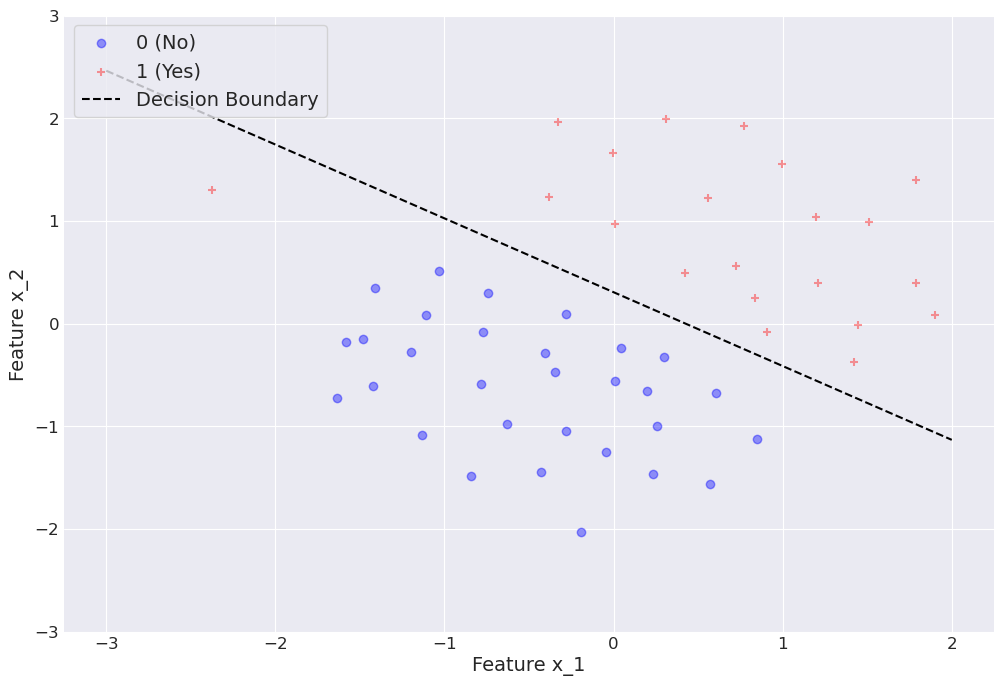

In [9]:
# plot the data and show the decision boundary.  Determine
# the decision boundary by hand (don't use a contour plot).  Make sure you
# scale  the data before plotting so that the decision boundary is correctly
# represented relative to the scaled data.  Make sure you label your axis and
# use a legend in your figure

# Scale X values and turn back into dataframe
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Create decision boundary line
boundary_x = np.linspace(-3, 2, 2)
boundary_y = (-1 * (svm_intercept[0] + (svm_coeffs[0][0] * boundary_x))) / svm_coeffs[0][1]

# plot
plt.scatter(X_scaled[y == 0]['x_1'], X_scaled[y == 0]['x_2'], color='blue', marker='o', label='0 (No)', alpha=0.4)
plt.scatter(X_scaled[y == 1]['x_1'], X_scaled[y == 1]['x_2'], color='red', marker='+', label='1 (Yes)', alpha=0.4)
plt.plot(boundary_x, boundary_y, color='black', linestyle='--', label='Decision Boundary')
plt.legend(loc='upper left', frameon=True)
plt.xlabel('Feature x_1')
plt.ylabel('Feature x_2')
plt.ylim(-3, 3) # Give some space for legend

If you performed the previous task correctly, you should see that your SVM classifier with the $C$ parameter set to 1 chooses a decision boundary that basically ignores the outlier point, and the decision boundary appears to be directly in the center of the
natural separation indicated by the gap between the positive and negative examples.


## Task 1.3: Fit Linear support vector classifier using small amount of regularization

In the next cell, repeat your previous work, but use a value of $C = 75$ for the $C$ parameter.

NOTE: you do not have to do anything here if the previous `task_1_2_linear_svm_classifier()` function
is correctly using the passed in `C` parameter.  The additional tests just check that you correctly
end up with expected intercept and coefficients for `C=75` here before you plot the new
decision boundary next.

In [10]:
# do not remove or modify the code in this cell
linclf = task_1_2_linear_svm_classifier(X, y, C=75.0)
run_unittests(['test_task_1_3_linear_svm_classifier'])

test_coef (test_assg_tasks.test_task_1_3_linear_svm_classifier.test_coef)
test_coef ... ok
test_intercept (test_assg_tasks.test_task_1_3_linear_svm_classifier.test_intercept)
test_intercept ... ok
test_model_parameters (test_assg_tasks.test_task_1_3_linear_svm_classifier.test_model_parameters)
test_model_parameters ... ok
test_model_pipeline (test_assg_tasks.test_task_1_3_linear_svm_classifier.test_model_pipeline)
test_model_pipeline ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.029s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

Also repeat your work in the next cell(s) to extract and display the coefficient and intercepts, 
and plot the decision boundary obtained using `C=75` regularization on
the scaled feature data.

In [11]:
# display the decision boundary for the coeficients by extracting the coefficients
# from your fitted linear SVC
svm_intercept = linclf[1].intercept_
svm_coeffs = linclf[1].coef_

# show the coefficients that were fitted to the data by the support vector machine
print(f'Intecept: {svm_intercept}')
print(f'Coefficients: {svm_coeffs}')

Intecept: [-1.50646674]
Coefficients: [[4.30510962 9.76428193]]


(-3.0, 3.0)

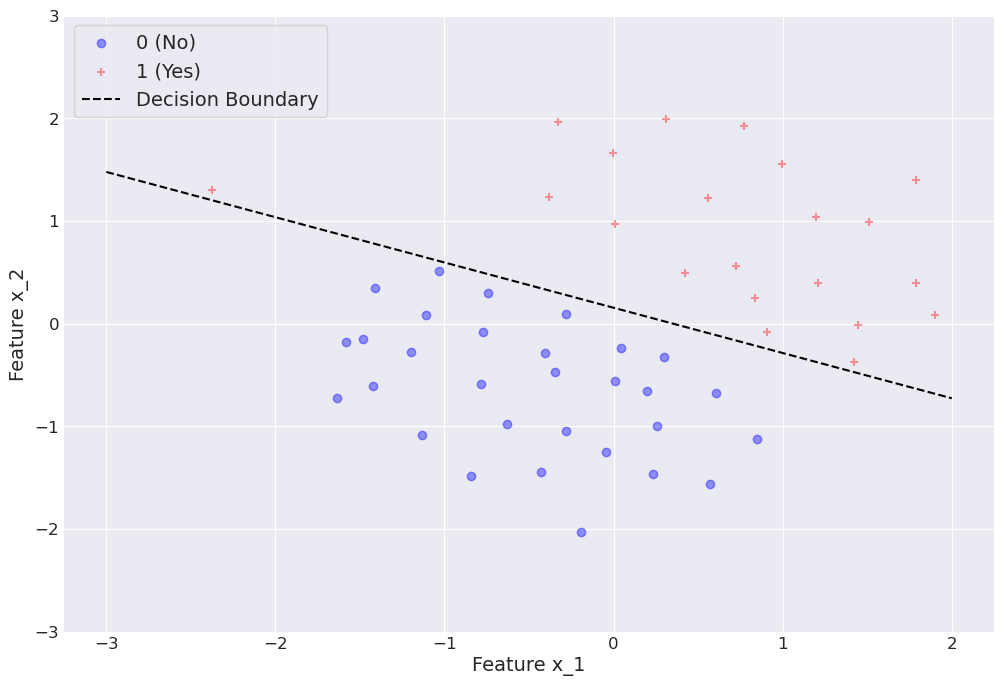

In [12]:
# plot the data and show the decision boundary.  Determine
# the decision boundary by hand (don't use a contour plot).  Make sure you
# scale  the data before plotting so that the decision boundary is correctly
# represented relative to the scaled data.  Make sure you label your axis and
# use a legend in your figure

# Create decision boundary line
boundary_x = np.linspace(-3, 2, 2)
boundary_y = (-1 * (svm_intercept[0] + (svm_coeffs[0][0] * boundary_x))) / svm_coeffs[0][1]

# plot
plt.scatter(X_scaled[y == 0]['x_1'], X_scaled[y == 0]['x_2'], color='blue', marker='o', label='0 (No)', alpha=0.4)
plt.scatter(X_scaled[y == 1]['x_1'], X_scaled[y == 1]['x_2'], color='red', marker='+', label='1 (Yes)', alpha=0.4)
plt.plot(boundary_x, boundary_y, color='black', linestyle='--', label='Decision Boundary')
plt.legend(loc='upper left', frameon=True)
plt.xlabel('Feature x_1')
plt.ylabel('Feature x_2')
plt.ylim(-3, 3) # Give some space for legend

Notice the effect that the large value of $C$ has on the decision boundary the model produces.  For learning models that use a
$C$ parameter, which affects how much weight is given to the cost of the differences between the model and the correct result, high
$C$ values will result in models that attempt to classify as much of the training data correctly as possible.  But, as we have
discussed, these may lead to overfitted models, that have problems generalizing.


## Task 2.1: SVM with Gaussian Kernels

The SVM classifier from the `scikit-learn` library implements all of the typical and standard kernel functions that are used for
this classifier.  However, the SVM classifier in `scikit-learn` will also let you specify your own kernel function, if you need
some sort of special kernel measure of similarity.  In this part of our assignment, we are not going to make up a new kernel function, but you will implement the gaussian kernel function.  We will then use your implementation of the gaussian kernel
to create an SVM classifier for a data set that is not linearly separable, and we will compare and show that your implementation
of the gaussian kernel is correct by comparing the results to what are obtained by using `scikit-learn`s implementation of
a gaussian kernel.

To find non-linear decision boundaries with SVM, we need to first implement a Gaussian kernel. 
You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples,
$(x^{(i)} , x^{(j)} )$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which 
determines how fast the similarity metric decreases (to 0) as the examples are further apart.

The gaussian kernel is defined as:

$$
K_{\textrm{gaussian}}(x^{(i)}, x^{(j)}) = \textrm{exp}(- \frac{\| x^{(i)} - x^{(j)} \|^2}{2 \sigma^2})
= \textrm{exp}(- \frac{\sum_{k=1}^{n} (x_k^{(i)} - x_k^{(j)})^2 }{2 \sigma^2})
$$

Here recall that $x^{(i)}$ and $x^{(j)}$ represent two separate points, where usually one is an input and the other is a landmark
location.  Both of these are $n$ dimensional vectors, where we have a measurement for each of the $n$ features of the data we
are trying to model.  The top part of the fraction calculates norm, which is related to the distance, between the
two points in $n$ dimensional space
then squares this value.  As you can see on the right side part of the equation, we can calculate this norm by 
simply summing up the square of the differences of each of the dimensions.  Also remember that $\sigma$ is simply a parameter
that controls how fast the function falls to 0 as the distance between the two given locations is increased.

In the next cell, complete the function in `src/assg_tasks.py` called  `gaussian_kernel()` that takes 2 n-dimensional (numpy) vectors as input.  It should
calculate the gaussian similarity between these two points and return the similarity measure as a scalar floating point
value.  The tests for this function will check that you have the basic implementation correct.  We
will use this function in part 3 of this assignment next.

In [13]:
# do not remove or modify the code in this cell
run_unittests(['test_task_2_1_gaussian_kernel'])

test_lowsimilarity (test_assg_tasks.test_task_2_1_gaussian_kernel.test_lowsimilarity)
test_lowsimilarity ... ok
test_midsimilarity (test_assg_tasks.test_task_2_1_gaussian_kernel.test_midsimilarity)
test_midsimilarity ... ok
test_moredimensions (test_assg_tasks.test_task_2_1_gaussian_kernel.test_moredimensions)
test_moredimensions ... ok
test_samelocation (test_assg_tasks.test_task_2_1_gaussian_kernel.test_samelocation)
test_samelocation ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.010s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

## Task 3.1: Load Example Dataset 2, Explore and Visualize

In the next cell we will load a new data set.  This data set still has 2 features ($n = 2$), but it is clearly not linearly
separable.  As you did before, complete the `task_3_1_load_data()` function first and make sure that it
passes the tests again for loading the data. The data in this file again has now initial row giving names
for the features and label, you need to handle this correctly when loading this file.

In [14]:
# do not remove or modify the code in this cell
X, y = task_3_1_load_data()
run_unittests(['test_task_3_1_load_data'])

test_X_properties (test_assg_tasks.test_task_3_1_load_data.test_X_properties)
test_X_properties ... ok
test_loaded_types (test_assg_tasks.test_task_3_1_load_data.test_loaded_types)
test_loaded_types ... ok
test_y_properties (test_assg_tasks.test_task_3_1_load_data.test_y_properties)
test_y_properties ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.016s

OK


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

Once you have the data loading and passing the tests for the second data set,
create a visualization of this data using red '+' markers for the positive examples and 
blue 'o' markers for the negative examples, as you have done for the first dataset.

Text(0, 0.5, 'Feature x_2')

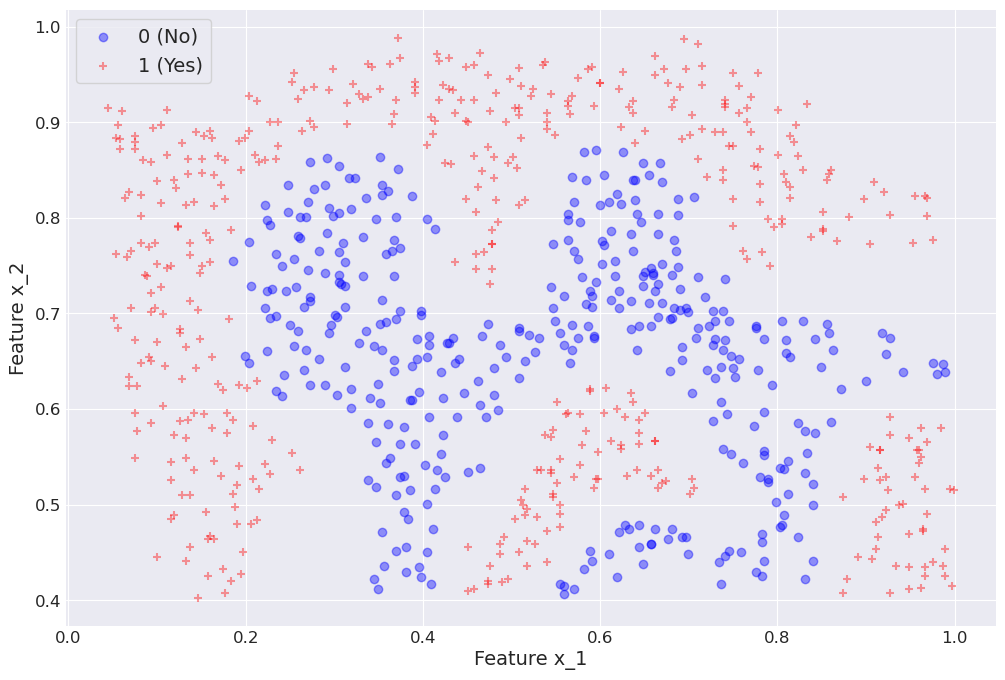

In [15]:
# plot the data to visualize it here.  Use red + for the positive label and
# blue o for the negative labels.  Make sure to label your axis and provide
# a legend for your plot
plt.scatter(X[y == 0]['x_1'], X[y == 0]['x_2'], color='blue', marker='o', label='0 (No)', alpha=0.4)
plt.scatter(X[y == 1]['x_1'], X[y == 1]['x_2'], color='red', marker='+', label='1 (Yes)', alpha=0.4)
plt.legend(loc='upper left', frameon=True)
plt.xlabel('Feature x_1')
plt.ylabel('Feature x_2')

## Task 3.2: Fit RBF Kernel for Nonlinear Decision Classifier

In our Lecture 10 notebook, we showed an example of creating a non-linear SVM classifier using a gaussian kernel.  This was our
last example in the lecture notebook.  In that example, by specifying the `gamma = 1.0` parameter when creating the SVM 
classifier, we were basically asking for a standard gaussian kernel.  

However, if you examine the
[scikit-learn SVM classifier documentation](http://scikit-learn.org/stable/modules/svm.html)
and read about the radial basis functions (rbf), you will find that the rbf kernel functions have the following definition:

$$
K_{\textrm{rbf}} = \textrm{exp}(- \gamma \|x - x' \|^2 )
$$

So to be precise, if you want to get exactly the gaussian kernel functions as were discussed in the video, where we have a $\sigma$
parameter which controls how fast the similarity decays between the 2 points to 0, we have the relationship between $\gamma$
and $\sigma$ of the following:

$$
\gamma = \frac{1}{2 \sigma^2}
$$

I have used the techniques discussed in the previous week 8 and found out that a value of $C = 1.0$ and a $\sigma = 0.25$ works
well for this second dataset to classify the data.  A $sigma$ of $0.25$ works out to $\gamma = \frac{1}{2 \times 0.25^2} = 8.0$.
In the next cell, finish the function to create a SVM classifer for the second data set.  Use a `rbf` kernel function with a $\sigma = 0.25$ (e.g.
set the `gamma` parameter that scikit-learn uses to be 8).  As with the first data set, this function should
create and return a `Pipeline` that first performs a standard scaling of the data.  Then the classifier is
next in the pipeline that uses the `C` and `gamma` parameters that are passed into this function.

So for the next step, you need to implement the `task_3_2_rbf_svm_classifier()` function.
This function should create a pipeline that performs a standard scaler on the data, and then
fits a support vector classifier to the data.  You need to use the `kernel`, `C`
and `gamma` parameters passed in to this function correctly as well in your implementation.

In [16]:
# you should use C=1.0 and gamma = 8.0 for the first rbf model here
C = 1.0
sigma = 0.25
gamma = 1.0 / (2.0 * sigma**2.0)
kernel = 'rbf'
print('Using gamma: ', gamma)

# do not remove or modify the code in this cell
rbfclf = task_3_2_rbf_svm_classifier(X, y, kernel=kernel, C=C, gamma=gamma)
run_unittests(['test_task_3_2_rbf_svm_classifier'])

test_intercept (test_assg_tasks.test_task_3_2_rbf_svm_classifier.test_intercept)
test_intercept ... ok
test_model_parameters (test_assg_tasks.test_task_3_2_rbf_svm_classifier.test_model_parameters)
test_model_parameters ... ok
test_model_pipeline (test_assg_tasks.test_task_3_2_rbf_svm_classifier.test_model_pipeline)
test_model_pipeline ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.039s

OK


Using gamma:  8.0


<unittest.runner.TextTestResult run=3 errors=0 failures=0>

After you have successfully created and fit the classifier and are passing
the tests, visualize the decision
boundary as we did in the lecture 10 notebook by creating a mesh of points to plot a contour of the boundary.  Use a step size of 0.01 at a minimum for your mesh.

/opt/conda/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


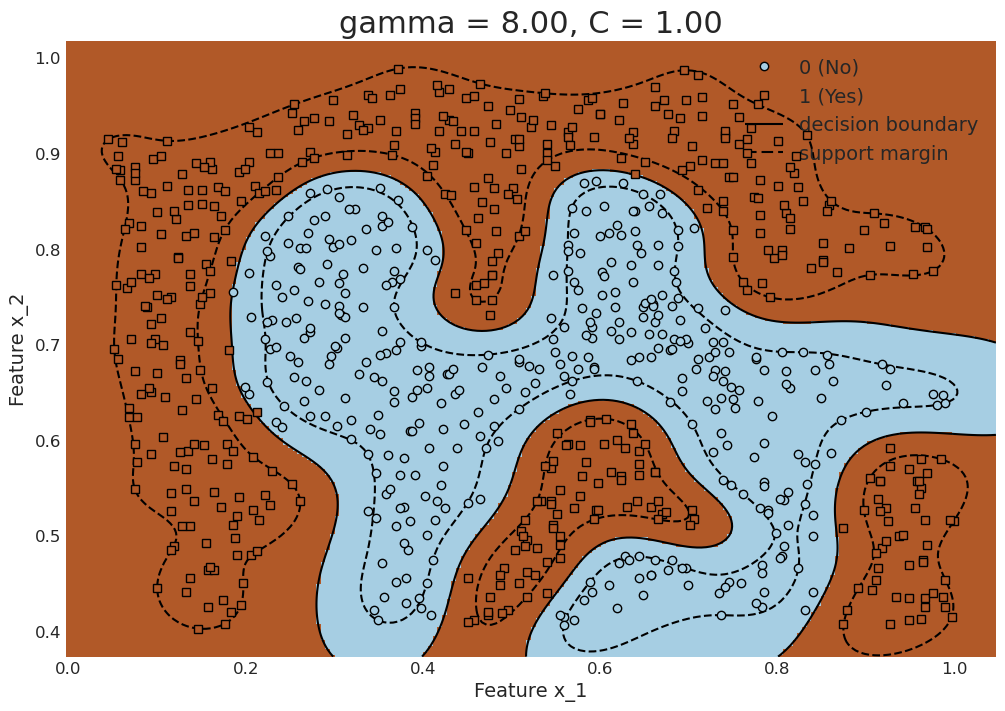

In [17]:
# Now display the results.  You will need to use the method of creating a contour plot
# to correctly visualize the resulting decision boundary here.  Make sure you
# also plot the data, correctly indicating the positive and negative
# labels, and adding in axis labels and a legend for the visualization

# Added function from lecture notebook to assg_tasks.py
plot_svm_decision_boundary(rbfclf, X, y,
                           class_0_label='0 (No)',
                           class_1_label='1 (Yes)',
                           feature_1_label='Feature x_1',
                           feature_2_label='Feature x_2'
                          )
plt.title(r'gamma = %0.2f, C = %0.2f' % (gamma, C), fontsize=22);

# Task 3.3: Use our own Hand-created Kernel Function

Lets just demonstrate that the `rbf` kernel function with a `gamma` of 8 is the same as the gaussian kernel function we saw in
our lecture notebook with a $\sigma$ value of 0.25.  In the next cell I have created a wrapper function that will call your
`gaussian_kernel` function you created previously.  This is the form of the function that `scikit-learn` expects when you want
to specify your own version of the kernel function to use.  I have also shown how to create the `scikit-learn` `SVM` classifier
specifying our user defined function for the kernel function.  Try training the classifier in the next cell using our own
user defined kernel functions.

In [18]:
def gaussian_kernel_combos(Xi, Xj):
    """Function to calculate gaussian kernel similarity between 2 matrices of points.  This function
    will be passed to the SVC classifier as the kernel to use, but it should be equivalent to the built
    in gaussian kernel rbf functions.  The Xi and Xj matrices should be of the same number of
    dimensions (columns) n, but they can be of different number of samples, e.g. (m1,n) and (m2,n) shaped.
    The result is a matrix of similarities of shape (m1, m2) where each row,column is the gaussian similarity
    between sample m1 and m2 of Xi, Xj respectively.
    
    Parameters
    ----------
    Xi, Xj - 2-dimensional matrices of shapes (mi, n) and (mj,n) respectively.  They need to have
      the same number of columns.  Each row represents a sample point in n dimensional space.
      
    Returns
    -------
    res - A (mi, mj) shaped 2-dimensional matrix.  Each value in the matrix is the similarity
       score of the ith,jth similarity of the corresponding point in Xi, Xj respectively.
    """
    sigma = 0.25
    mi, n = Xi.shape
    mj, n = Xj.shape
    res = np.zeros( (mi, mj) )
    #print res.shape
    for i, xi in enumerate(Xi):
        for j, xj in enumerate(Xj):
            similarity = gaussian_kernel(xi, xj, sigma)
            res[i, j] = similarity
    return res

In [19]:
X.shape

(863, 2)

In [20]:
X_train = X[:5].values
print(X_train.shape)
sim = gaussian_kernel_combos(X_train, X_train)
print(sim.shape)
print(sim)

(5, 2)
(5, 5)
[[1.         0.98114111 0.91900313 0.75453756 0.52728011]
 [0.98114111 1.         0.97544573 0.83887706 0.6156896 ]
 [0.91900313 0.97544573 1.         0.92643834 0.73427023]
 [0.75453756 0.83887706 0.92643834 1.         0.92488422]
 [0.52728011 0.6156896  0.73427023 0.92488422 1.        ]]


In [21]:
X_test = X[5:8].values
print(X_test.shape)

(3, 2)


In [22]:
sim = gaussian_kernel_combos(X_train, X_test)
print(sim.shape)
print(sim)

(5, 3)
[[0.28887488 0.18021941 0.05012471]
 [0.34449135 0.21107256 0.05627429]
 [0.43823179 0.27193264 0.07352983]
 [0.66597741 0.45709431 0.14742039]
 [0.86754349 0.65632901 0.25070335]]


In the following cell, your implementation of the task function to fit a 
nonlinear SVM classifier using a kernel is again invoked.  However, in this case
the function to use to calculate the kernel is passed in (and we don't specify
gamma as the gamma/sigma is hardcoded into this kernel function).  So you
shouldn't need to do anything in the next cell, and when you replot your decision
boundary, you should see you get the same result as using the `sklearn` `rbf`
kernel.

In [23]:
# you should use C=1.0 for the first rbf model here
C = 1.0
kernel = gaussian_kernel_combos

# do not remove or modify the code in this cell
rbfclf = task_3_2_rbf_svm_classifier(X, y, kernel=kernel, C=C)

In the next cell, plot again the decision boundary (using a h step size of 0.01) for this classifier using our user defined
kernel functions.  Notice that this implementation is much slower.  However, if you examine the decision boundary that was 
produced,  you should see that we are getting basically the same model and decision boundary using the two ways of specifying
the gaussian kernel function.

/opt/conda/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


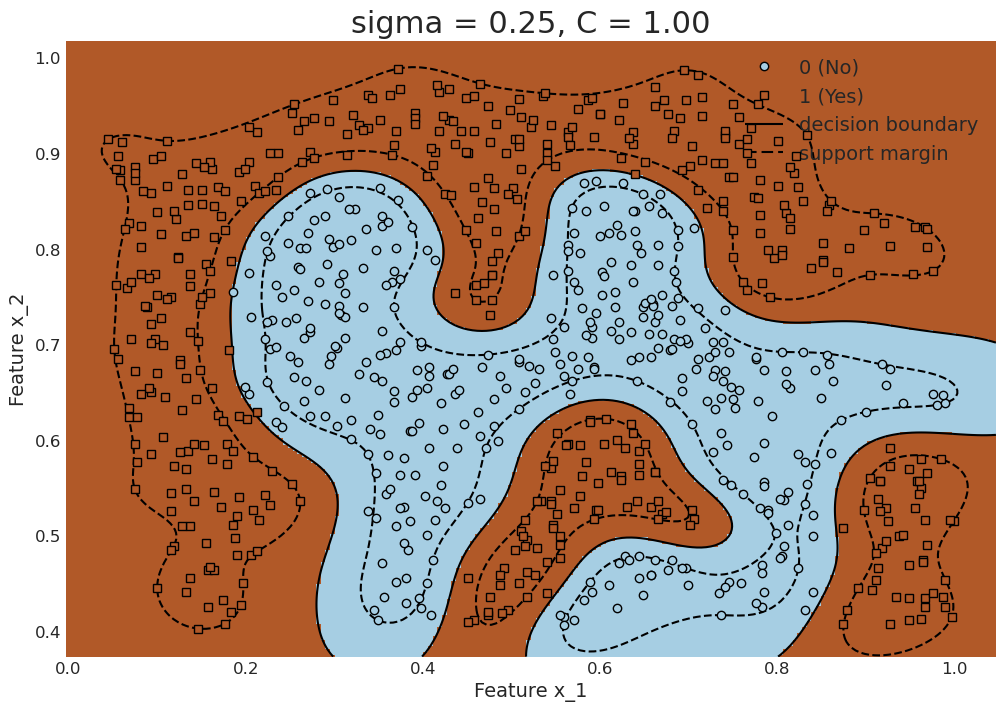

In [24]:
# Now display the results.  You will need to use the method of creating a contour plot
# to correctly visualize the resulting decision boundary here.  Make sure you
# also plot the data, correctly indicating the positive and negative
# labels, and adding in axis labels and a legend for the visualization
# You should find that the resulting model is exactly the same here as when we used the sklearn
# rbf kernel
plot_svm_decision_boundary(rbfclf, X, y,
                           class_0_label='0 (No)',
                           class_1_label='1 (Yes)',
                           feature_1_label='Feature x_1',
                           feature_2_label='Feature x_2',
                           remove_bias = True
                          )
plt.title(r'sigma = %0.2f, C = %0.2f' % (sigma, C), fontsize=22);